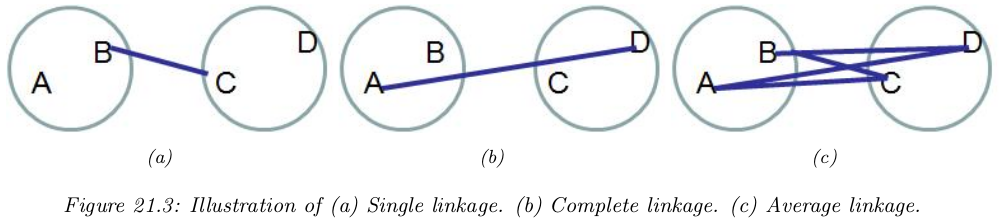

In [57]:
import math


def distance(p, q):
    return math.sqrt(sum([(pi - qi)**2 for pi, qi in zip(p, q)]))


def single_link(ci, cj):
    return min([distance(vi, vj) for vi in ci for vj in cj])


def complete_link(ci, cj):
    return max([distance(vi, vj) for vi in ci for vj in cj])


def average_link(ci, cj):
    distances = [distance(vi, vj) for vi in ci for vj in cj]
    return sum(distances) / len(distances)


def get_distance_measure(M):
    if M == 0:
        return single_link
    elif M == 1:
        return complete_link
    else:
        return average_link

In [58]:
class AgglomerativeHierarchicalClustering:
    def __init__(self, data, K, M):
        self.data = data
        self.N = len(data)
        self.K = K
        self.measure = get_distance_measure(M)
        self.clusters = self.init_clusters()

    def init_clusters(self):
        return {data_id: [data_point] for data_id, data_point in enumerate(self.data)}

    def find_closest_clusters(self):
        min_dist = math.inf
        closest_clusters = None

        clusters_ids = list(self.clusters.keys())

        for i, cluster_i in enumerate(clusters_ids[:-1]):
            for j, cluster_j in enumerate(clusters_ids[i+1:]):
                dist = self.measure(self.clusters[cluster_i], self.clusters[cluster_j])
                if dist < min_dist:
                    min_dist, closest_clusters = dist, (cluster_i, cluster_j)
        return closest_clusters

    def merge_and_form_new_clusters(self, ci_id, cj_id):
        new_clusters = {0: self.clusters[ci_id] + self.clusters[cj_id]}

        for cluster_id in self.clusters.keys():
            if (cluster_id == ci_id) | (cluster_id == cj_id):
                continue
            new_clusters[len(new_clusters.keys())] = self.clusters[cluster_id]
        return new_clusters

    def run_algorithm(self):
        while len(self.clusters.keys()) > self.K:
            closest_clusters = self.find_closest_clusters()
            self.clusters = self.merge_and_form_new_clusters(*closest_clusters)

    def print(self):
        for id, points in self.clusters.items():
            print("Cluster: {}".format(id))
            for point in points:
                print("    {}".format(point))

In [59]:
import numpy as np
import pandas as pd
def get_df_with_labels(agg_hierarchical_clustering, dataset):
    """
    Create a DataFrame with the clusters and their corresponding labels.
    """
    # Create an empty DataFrame with the same number of rows as the dataset
    # and one additional column for the cluster labels
    data = np.zeros((len(dataset), len(dataset[0])+1))
    start_id = 0
    for k in agg_hierarchical_clustering.clusters.keys():
        d = agg_hierarchical_clustering.clusters[k]
        data[start_id:start_id+len(d), -1] = k
        d_cl = np.array(d)
        print(d_cl.shape)
        data[start_id:start_id+len(d), :-1] = d_cl
        start_id += len(d)
    data = pd.DataFrame(data,columns=['X','Y', "label"])
    return data


In [60]:
import pandas as pd
df=pd.read_csv('./data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [61]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df=df.drop(['CustomerID', 'Gender', "Age"],axis=1)
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [62]:
data = []
for index, row in df.iterrows():
    data.append([row[x] for x in df.columns])
data

[[15, 39],
 [15, 81],
 [16, 6],
 [16, 77],
 [17, 40],
 [17, 76],
 [18, 6],
 [18, 94],
 [19, 3],
 [19, 72],
 [19, 14],
 [19, 99],
 [20, 15],
 [20, 77],
 [20, 13],
 [20, 79],
 [21, 35],
 [21, 66],
 [23, 29],
 [23, 98],
 [24, 35],
 [24, 73],
 [25, 5],
 [25, 73],
 [28, 14],
 [28, 82],
 [28, 32],
 [28, 61],
 [29, 31],
 [29, 87],
 [30, 4],
 [30, 73],
 [33, 4],
 [33, 92],
 [33, 14],
 [33, 81],
 [34, 17],
 [34, 73],
 [37, 26],
 [37, 75],
 [38, 35],
 [38, 92],
 [39, 36],
 [39, 61],
 [39, 28],
 [39, 65],
 [40, 55],
 [40, 47],
 [40, 42],
 [40, 42],
 [42, 52],
 [42, 60],
 [43, 54],
 [43, 60],
 [43, 45],
 [43, 41],
 [44, 50],
 [44, 46],
 [46, 51],
 [46, 46],
 [46, 56],
 [46, 55],
 [47, 52],
 [47, 59],
 [48, 51],
 [48, 59],
 [48, 50],
 [48, 48],
 [48, 59],
 [48, 47],
 [49, 55],
 [49, 42],
 [50, 49],
 [50, 56],
 [54, 47],
 [54, 54],
 [54, 53],
 [54, 48],
 [54, 52],
 [54, 42],
 [54, 51],
 [54, 55],
 [54, 41],
 [54, 44],
 [54, 57],
 [54, 46],
 [57, 58],
 [57, 55],
 [58, 60],
 [58, 46],
 [59, 55],
 [59,

In [63]:

agg_hierarchical_clustering = AgglomerativeHierarchicalClustering(data, K=5, M=1)
agg_hierarchical_clustering.run_algorithm()

In [64]:
data_df = get_df_with_labels(agg_hierarchical_clustering, data)
data_df.columns

(39, 2)
(32, 2)
(85, 2)
(23, 2)
(21, 2)


Index(['X', 'Y', 'label'], dtype='object')

<Axes: xlabel='X', ylabel='Y'>

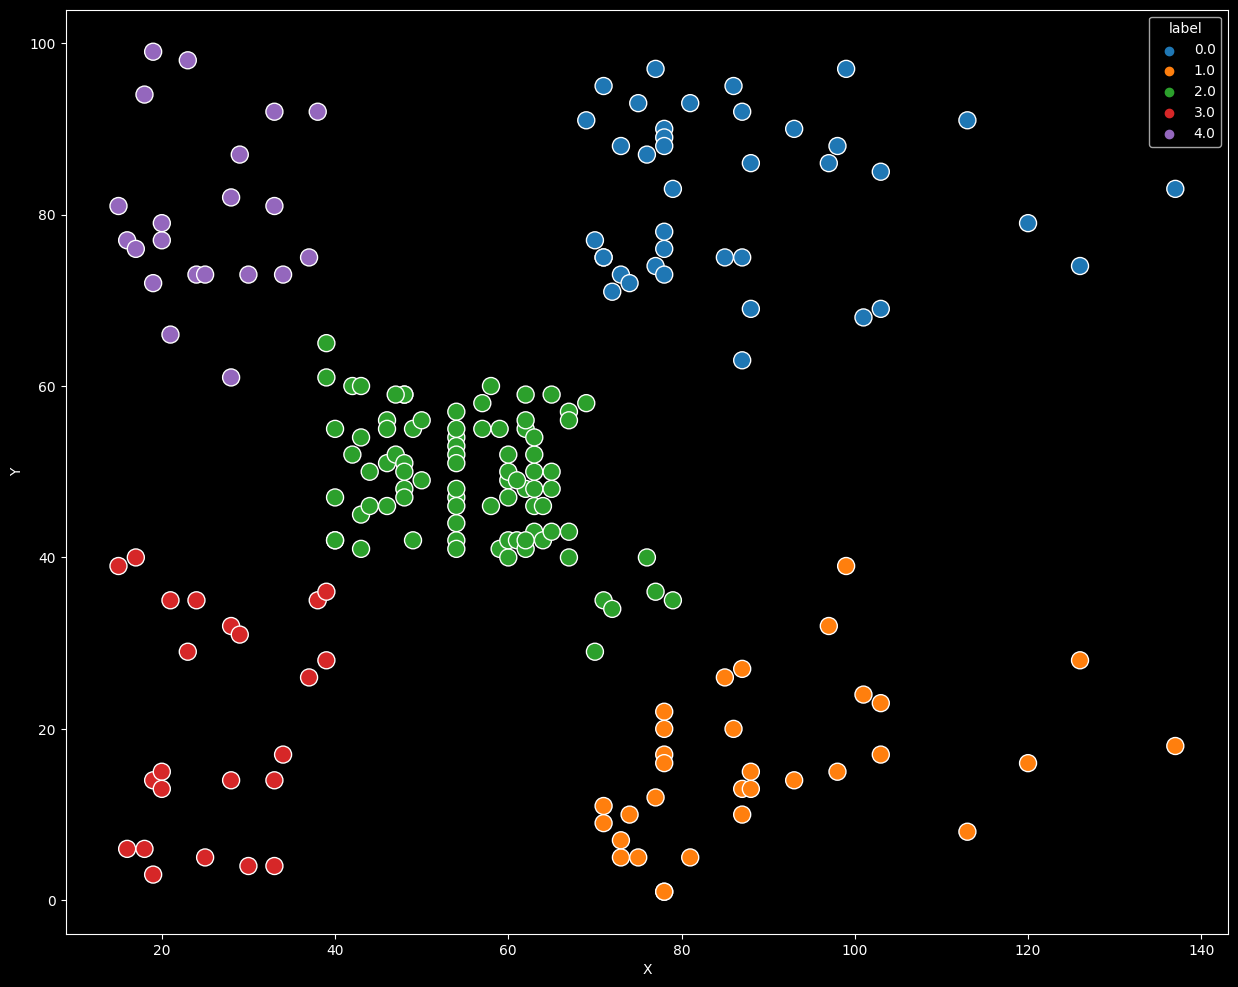

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
plt.figure(figsize=(15,12))
sns.scatterplot(x='X',y='Y',data=data_df,hue='label',s=150,palette='tab10')